In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [3]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [8]:
df['Survived'].sum() / len(df['Survived'])

0.3838383838383838

In [9]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

In [10]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [11]:
df.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

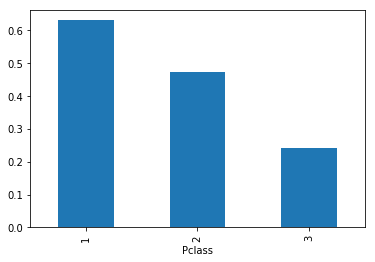

In [12]:
df.groupby('Pclass')['Survived'].aggregate(survival_ratio).plot(kind='bar')